In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
sys.path.append(os.path.join('..','UTILS'))
from cosamp_fn import cosamp
# cosamp function is available at https://github.com/avirmaux/CoSaMP

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

In [2]:
## Generate signal, DCT of signal

n = 4096 # points in high resolution signal
t = np.linspace(0,1,n)
x = np.cos(2 * 97 * np.pi * t) + np.cos(2 * 777 * np.pi * t)
xt = np.fft.fft(x) # Fourier transformed signal
PSD = xt * np.conj(xt) / n # Power spectral density

In [23]:
## Randomly sample signal
p = 128 # num. random samples, p = n/32
perm = np.floor(np.random.rand(p) * n).astype(int)
y = x[perm]
print(y)

[ 1.88307330e+00 -1.89193661e+00  7.30726691e-01 -7.66769827e-01
  1.96892323e-01 -8.58457036e-02 -1.15851805e+00 -5.08790965e-03
 -5.59455284e-02 -2.15342826e-01 -2.51636965e-01  3.15904994e-01
  2.81521787e-02  8.38142508e-03  7.50661385e-02  2.74520590e-02
  5.34963999e-01 -4.26623508e-01  4.94428876e-02  1.29634367e+00
  5.16904806e-01  1.92035965e-01  6.10642573e-01  1.75096597e+00
  7.08073862e-04  2.76052013e-01  2.05538127e-01  9.83731962e-01
 -1.60434399e+00  1.45199083e-01 -3.05150221e-01 -1.58555930e+00
  7.70547974e-01  2.35013554e-02  2.55595968e-01 -5.33914005e-01
 -1.21550111e+00 -2.14849805e-01  1.13468537e+00  6.73423510e-01
 -1.96176376e+00 -1.98005449e-01 -8.15224718e-01  8.93879591e-02
 -3.44320928e-01  1.05659680e+00  8.77632051e-01 -4.69296695e-01
  1.38453126e+00 -2.99269285e-01 -2.66458565e-02  1.97459586e+00
 -4.63399965e-01 -7.14902727e-01  6.74103943e-01 -1.82898240e+00
 -5.95171240e-01  3.83726929e-01 -7.18767943e-02  3.31097211e-01
  4.10187678e-03 -6.74603

In [30]:
## Solve compressed sensing problem
Psi = dct(np.identity(n)) # Build Psi
Theta = Psi[perm,:]       # Measure rows of Psi

s = cosamp(Theta,y,10,epsilon=1.e-10,max_iter=10) # CS via matching pursuit
xrecon = idct(s) # reconstruct full signal

<ipython-input-32-4e2485a8af54>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[1].plot(freq[:L],PSD[:L],color='k',LineWidth=2)
C:\Users\SE79065\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-32-4e2485a8af54>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[0].plot(t,x,color='k',LineWidth=2)
<ipython-input-32-4e2485a8af54>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[0].plot(perm/n,y,color='r',marker='x',LineWidth=0,ms=12,mew=4)
<ipython-input-32-4e2485a8af54>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support 

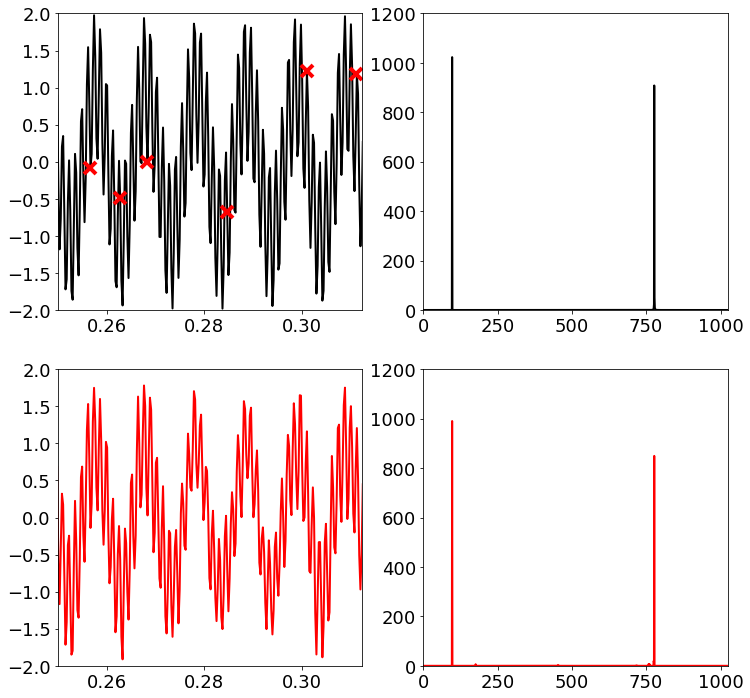

In [32]:
## Plot
time_window = np.array([1024,1280])/4096
freq = np.arange(n)
L = int(np.floor(n/2))


fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[1].plot(freq[:L],PSD[:L],color='k',LineWidth=2)
axs[1].set_xlim(0, 1024)
axs[1].set_ylim(0, 1200)

axs[0].plot(t,x,color='k',LineWidth=2)
axs[0].plot(perm/n,y,color='r',marker='x',LineWidth=0,ms=12,mew=4)
axs[0].set_xlim(time_window[0],time_window[1])
axs[0].set_ylim(-2, 2)

axs[2].plot(t,xrecon,color='r',LineWidth=2)
axs[2].set_xlim(time_window[0],time_window[1])
axs[2].set_ylim(-2, 2)

xtrecon = np.fft.fft(xrecon,n) # computes the (fast) discrete fourier transform
PSDrecon = xtrecon * np.conj(xtrecon)/n # Power spectrum (how much power in each freq)

axs[3].plot(freq[:L],PSDrecon[:L],color='r',LineWidth=2)
axs[3].set_xlim(0, 1024)
axs[3].set_ylim(0, 1200)

plt.show()

In [ ]:
## L1-Minimization using SciPy
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y 
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s = res.x
print(s)

In [7]:
Theta.shape

(128, 4096)

In [8]:
y.shape

(128,)